In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/home/prasun/GitDemo/Learning_Deep_Learning/Lesson6/banglore_house.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler()
sc_y = MinMaxScaler()
scaled_X = sc_x.fit_transform(df.drop(["price"],axis="columns"))
scaled_y = sc_y.fit_transform(df[["price"]])


In [4]:
w1 = np.array([[1.],[1.]])
w2 = np.array([1.,1.])
print(w1.shape, w2.shape)
# (w.dot(scaled_X))

(2, 1) (2,)


In [5]:
def batch_gd(X,y_label,epochs=100,rate =0.05):
    num_of_feature = X.shape[1]
    w = np.ones(num_of_feature)
    b = 0
    sample = X.shape[0]

    cost_lst = []
    epoch_lst = []

    for i in range(epochs):
        f_x = np.dot(w,X.T) + b
        dj_dw =  np.dot(scaled_X.T,(f_x - y_label))/sample
        dj_db =  np.mean(f_x - y_label)

        w = w - (rate * dj_dw)
        b = b - (rate * dj_db)

        cost = np.mean(np.square(y-f_x))/2

        cost_lst.append(cost)
        epoch_lst.append(i)

    return w,b,cost_lst,epoch_lst 


In [6]:
y =scaled_y.reshape(scaled_y.shape[0])

In [7]:
w,b,cost_lst,epoch_lst = batch_gd(scaled_X,y,epochs= 200)
w,b

(array([0.70697753, 0.6744668 ]), -0.23023942096425665)

Text(0.5, 1.0, 'Learning Curve')

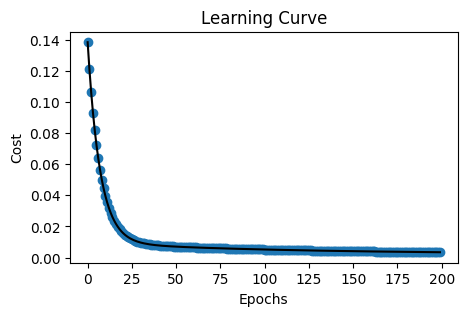

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize= (5,3))
plt.scatter(epoch_lst,cost_lst)
plt.plot(epoch_lst,cost_lst,color ="black")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Learning Curve")

In [53]:
def predict(area,bedroom,w,b):
    X = pd.DataFrame([area,bedroom])
    X_scaled = sc_x.transform([[area,bedroom]])[0]
    scaled_price = w[0]*X_scaled[0] +w[1]*X_scaled[1] + b
    return sc_y.inverse_transform([[scaled_price]])[0][0]    

In [54]:
predict(2600,4,w,b)

128.44728299049075

In [63]:
import random
random.randint(0,6)

2

In [78]:
import random
def stochastic_gradient_descent(X,y_label,epochs=100,rate=0.05):
    num_of_feature = X.shape[1]
    w = np.ones(num_of_feature)
    b = 0
    sample_size = X.shape[0]

    cost_lst = []
    epoch_lst = []

    for i in range(epochs):
        ranidx = random.randint(0,sample_size-1)
        X_idx = X[ranidx]
        y_idx = y_label[ranidx]
        f_x = np.dot(X_idx.T,w) + b
        dj_dw =  np.dot(X_idx.T,(f_x - y_idx))/sample_size
        dj_db =  np.mean(f_x - y_idx)

        w = w - (rate * dj_dw)
        b = b - (rate * dj_db)

        cost = np.square(f_x-y_idx)

        if i%10 == 0:
            cost_lst.append(cost)
            epoch_lst.append(i) 

    return w,b,cost_lst,epoch_lst


In [81]:
w_sgd,b_sgd,cost_lst,epoch_lst = stochastic_gradient_descent(scaled_X,y,epochs= 500)
cost_lst,epoch_lst

([0.5167277874827307,
  0.05420754370080599,
  0.04399452069195482,
  0.0005744162119835794,
  0.006057579595949614,
  0.07132209610603182,
  0.006351305535680987,
  0.030365332435626745,
  0.003640569444990761,
  0.031392375983520675,
  0.014876046366396339,
  0.08499867011925295,
  0.045307188400255834,
  0.010216689612782322,
  0.0200578297572579,
  0.018914558926570475,
  0.218525053866969,
  0.002769921839680755,
  0.022821807112344498,
  0.016800482984701916,
  0.01990241750447819,
  0.0056576887961454145,
  0.177265228399378,
  0.015346627939684426,
  0.14596683115834586,
  0.002873984558224408,
  0.014427718621610186,
  1.2389054814773329e-05,
  0.015974304059344857,
  0.015212503784590551,
  0.037506806970990104,
  0.00017107439673422938,
  0.042732204803905396,
  0.0165583684243785,
  0.050542078334743376,
  0.047636202052036815,
  1.3238181438894976e-05,
  0.20250965590910253,
  0.013497856728067267,
  0.04774694648577891,
  0.005023387905443241,
  0.2438310240841274,
  0.01

Text(0.5, 1.0, 'Learning Curve')

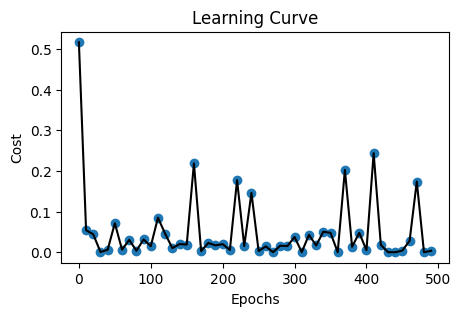

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize= (5,3))
plt.scatter(epoch_lst,cost_lst)
plt.plot(epoch_lst,cost_lst,color ="black")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Learning Curve")